<a href="https://colab.research.google.com/github/Nniikkoollaass/forecasting-customer-outflow/blob/model-development/model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install h5py keras tensorflow

XGBoost (eXtreme Gradient Boosting) - метод підсилення градієнта (Gradient Boosting), який використовується для задач класифікації та регресії.

Використовується для задач класифікації та регресії.

Алгоритм базується на побудові ансамблю слабких моделей (дерев рішень), де кожне наступне дерево намагається виправити помилки попередніх.

Метою є зменшення помилки на тренувальній вибірці через підсилення (boosting).

Це алгоритм ансамблевого навчання, який використовує метод градієнтного бустингу над деревами рішень.

XGBoost створює ансамбль дерев рішень, послідовно додаючи нові дерева, які коригують помилки попередніх.

Головна ідея полягає в додаванні нових дерев таким чином, щоб мінімізувати втрати за рахунок використання градієнта помилки. XGBoost поєднує результати багатьох дерев рішень для отримання остаточного прогнозу.

В XGBoost використовується метод градієнтного бустингу для покращення точності моделей, що включає побудову нових дерев на основі залишкових помилок попередніх дерев.

XGBoost використовує дерева рішень як базові моделі, але він включає додаткові механізми для покращення продуктивності і точності, роблячи його більш складним і потужним алгоритмом порівняно з окремими деревами рішень.

"Бустинг" (boosting) означає метод ансамблевого навчання, який покращує продуктивність слабких моделей (наприклад, дерев рішень) шляхом їх послідовного навчання. Ідея полягає в тому, щоб додавати нові моделі, які коригують помилки попередніх моделей. У підсумку, ці моделі комбінуються для отримання більш точної остаточної моделі.

Спочатку тренується базова модель (перше дерево рішень) на всіх даних.

Обчислюються помилки або залишки (різниця між прогнозованими та фактичними значеннями).

Друга модель тренується на основі цих помилок. Вона намагається передбачити помилки попередньої моделі.

Результати першої та другої моделей комбінуються для поліпшення точності.

Процес повторюється, додаванням нових моделей, кожна з яких коригує помилки попередніх. Кожна наступна модель додається таким чином, щоб мінімізувати загальні помилки.

Навчання відбувається послідовно, де кожне наступне дерево в ансамблі намагається виправити помилки попередніх дерев, оптимізуючи залишкові помилки за допомогою градієнтного спуску.

При кожній ітерації вага даних, які були неправильно класифіковані, збільшується, що змушує наступні моделі більше зосереджуватися на цих складних випадках.

Кінцева модель являє собою ансамбль багатьох слабких моделей, де кожна нова модель коригує помилки попередніх, що призводить до високої точності прогнозування.

Бустинг є потужним інструментом у машинному навчанні, який дозволяє створювати точні прогностичні моделі, комбінуючи кілька слабких моделей у сильний ансамбль.

Accuracy: 0.9441649196366177
Recall: 0.9387229660144182
Precision: 0.9575837163493106
F1 Score: 0.9480595462523566
ROC-AUC: 0.9446748428360076
Best parameters found: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 100}
Cross-validation scores for XGBoost: [0.94219826 0.94369572 0.93920335 0.93890386 0.94699012 0.9442947
 0.94549266 0.94219826 0.94249775 0.94547633]
Mean cross-validation score for XGBoost: 0.9430951026155476


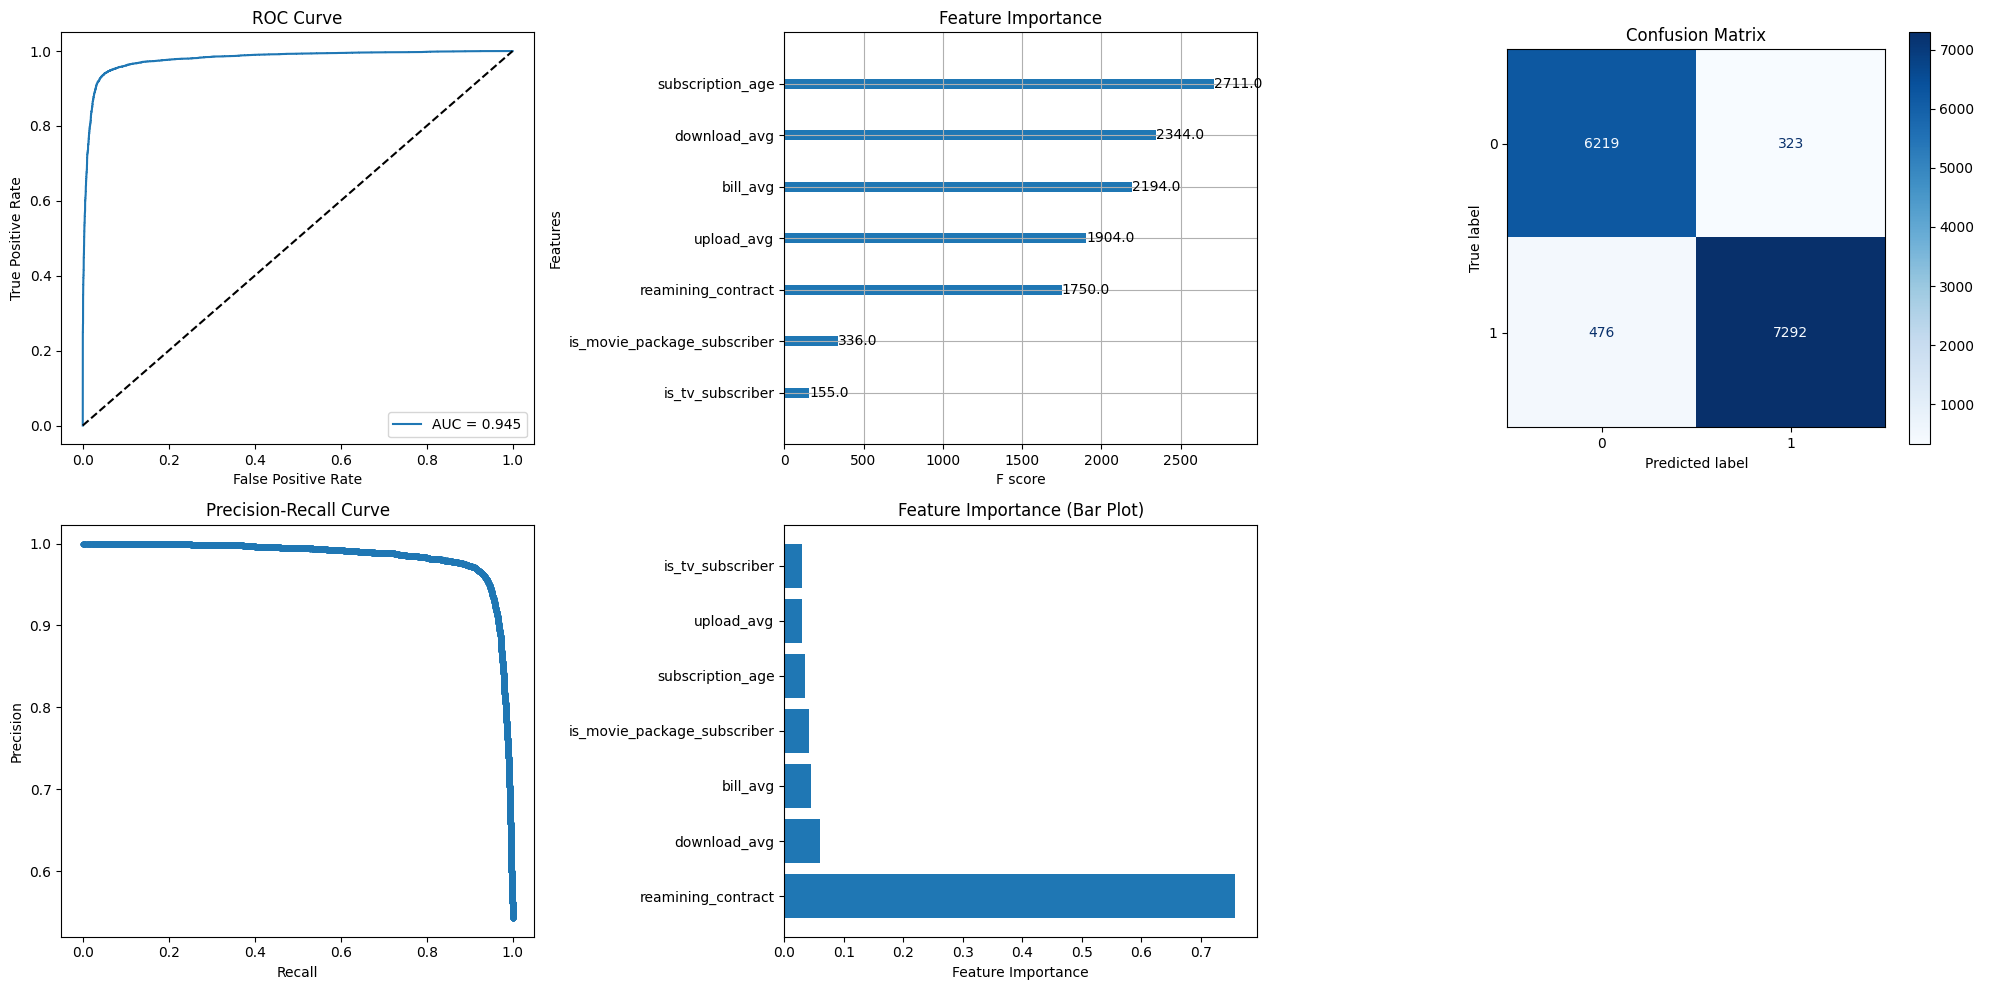

In [4]:
# імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

# завантажуємо дані
data_5 = pd.read_csv('/content/sample_data/data/data_3.csv')

# розділяємо дані на ознаки (X) та мітки (y)
# видаляємо колонку 'сhurn' з набору даних data, залишаючи всі інші колонки як ознаки. axis=1 означає, що ми видаляємо колонку, а не рядок
X = data_5.drop('churn', axis=1)  # будуть ознаки - є даними, на основі яких ми будемо робимо прогнози
# вибираємо колонку 'сhurn' як цільову змінну, яку модель буде прогнозувати
y = data_5['churn'] # це мітка - є тим, що ми намагаємося передбачити

# використовуємо train_test_split для розподілу даних на навчальну та тестову вибірки
x_trained, x_tested, y_trained, y_tested = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# 'test_size': відсоток даних, що будуть використані для тестування в нашому вмпадку 30 % (зазвичай буває 20-30 %)
# 'random_state': є параметром, який використовується для фіксації початкового значення генератора випадкових чисел
# фіксоване значення random_state дозволяє будь-кому отримувати однакові результати при кожному запуску коду

# клас XGBClassifier з бібліотеки XGBoost (Extreme Gradient Boosting) використовується для класифікаційних завдань машинного навчання
# створюємо екземпляр моделі XGBoost для класифікації з параметрами за замовчуванням
# це означає, що модель буде працювати з налаштуваннями, які розробники XGBoost вважають оптимальними для широкого спектру завдань
# якби для забезпечення балансу між простотою початкового налаштування
# і можливістю гнучкої оптимізації для досягнення найкращих результатів
# при потребі можна використати наступні парамемтри:
# 1 - 'n_estimators': кількість дерев у моделі (кількість ітерацій бустингу)
# 2 - 'learning_rate': швидкість навчання, це коефіцієнт,
# на який зменшується вплив кожного додаткового дерева, типові значення: 0.01, 0.1, 0.2
# 3 - 'max_depth': максимальна глибина кожного дерева
# більші значення можуть призвести до перенавчання, менші - до недонавчання
# 4 - 'min_child_weight': мінімальна сума ваг усіх спостережень, необхідних у вузлі
# використовується для запобігання перенавчанню
# 5 - 'subsample': відсоток вибірки для кожного дерева
# значення між 0 і 1, використовується для запобігання перенавчанню
# 6 - 'colsample_bytree': відсоток вибірки ознак для кожного дерева, Значення між 0 і 1
# 7 - 'gamma': мінімальна зміна функції втрат, необхідна для розщеплення вузла
# чим більше значення, тим жорсткіші умови для розщеплення вузла
# 8 - 'reg_alpha': L1 регуляризація ваг
# 9 - 'reg_lambda': L2 регуляризація ваг
# вузол (node) - це точка, на якій дані розділяються на дві частини,
# виходячи з певного критерію, Кожне дерево у моделі складається з кореневого вузла, внутрішніх вузлів та листових вузлів
xgb_model = xgb.XGBClassifier()

# задаємо діапазони значень для гіперпараметрів, які будуть використовуватися в процесі пошуку
# найкращих параметрів моделі XGBoost за допомогою GridSearchCV
# кожен параметр має список можливих значень, які GridSearchCV буде перебирати для визначення оптимальних
# GridSearchCV — це метод з бібліотеки scikit-learn, що використовується для автоматизованого підбору
# гіперпараметрів моделі шляхом перебору всіх можливих комбінацій заданих параметрів
# і вибору найкращих на основі певного критерію оцінки
# - 1 - 'learning_rate' (або 'eta') - швидкість навчання визначає, наскільки швидко
# або повільно модель оновлює свої параметри під час тренування
# це коефіцієнт, на який помножаються ваги, щоб зменшити їхній вплив, тим самим стабілізуючи процес навчання
# зазвичай менші значення learning_rate призводять до більш стабільного навчання,
# але потребують більшої кількості ітерацій (тобто більшого значення 'n_estimators')
# - 2 - 'n_estimators' - rількість дерев у моделі, більша кількість дерев може поліпшити точність моделі, але також може призвести до перенавчання
# оптимальне значення зазвичай залежить від розміру та складності набору даних
# більше значення n_estimators потребує більше часу для навчання
# - 3 - 'max_depth' - максимальна глибина кожного дерева, визначає, наскільки глибоким може бути кожне дерево в ансамблі
# глибші дерева можуть захоплювати більш складні взаємозв'язки в даних,
# але також можуть призвести до перенавчання, менша глибина може призвести до недонавчання
xgb_parameters = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 9]}

# крос-валідація
# використовуємо GridSearchCV для пошуку кращих параметрів
xgb_search = GridSearchCV(xgb_model, xgb_parameters, cv=10, scoring='accuracy')
# 'xgb_model': наша модель
# 'xgb_parameters': наші діапазони параметрів
# 'cv': означає кількість фолдів у крос-валідації, ми використовуємо 10-кратну крос-валідацію,
# тобто дані розбиваються на 10 частин, і кожна частина по черзі використовується як тестовий набір,
# тоді як інші частини використовуються як тренувальні набори
# 'scoring': задає метрику, яку використовують для оцінки продуктивності моделі,
# таким чином ми забезпечуємо автоматичний пошук оптимальних гіперпараметрів,
# запобігаємо перенавчанню та також використання крос-валідації з різними фолдами;
# він надає більш об'єктивну оцінку продуктивності моделі порівняно з простою тренувальною та тестовою вибіркою


# виконуємо навчання моделі на навчальних даних x_trained і мітках y_trained
xgb_search.fit(x_trained, y_trained)
# - 'x_trained': це навчальні дані, які включають ознаки (фічі), використані для навчання моделі,
# в нашому випадку це всі колонки датасету, крім колонки міток сhurn
# - 'y_trained': це мітки, що вказують на цільові значення (в даному випадку churn),
# які модель має навчитися передбачати. Мітки вказують, чи залишився клієнт (0) або припинив користування послугами (1)

# навчання моделі з кращими параметрами
# атрибут 'best_estimator_' зберігає модель з найкращою комбінацією гіперпараметрів
# ця модель тепер готова до використання для прогнозування на нових даних
best_model = xgb_search.best_estimator_

# зберігаємо модель XGBoost в json файл для етапу підготовки інтерфейсу
best_model.save_model('xgb_model.json')

# робимо передбачення на тестовій вибірці
y_predicted = best_model.predict(x_tested)

# оцінка моделі
# точність визначає частку правильних передбачень серед усіх передбачень
# надає загальну оцінку, як добре модель класифікує дані
# ця функція з бібліотеки scikit-learn обчислює точність моделі,
# порівнюючи фактичні мітки y_tested з передбаченими мітками y_predicted.
accuracy = accuracy_score(y_tested, y_predicted)
# повнота визначає частку правильно передбачених позитивних прикладів серед усіх фактичних позитивних прикладів
recall = recall_score(y_tested, y_predicted)
# точність визначає частку правильно передбачених позитивних прикладів серед усіх передбачених позитивних прикладів
# важлива, коли вартість помилково позитивних прикладів висока
precision = precision_score(y_tested, y_predicted)
# є гармонійним середнім між точністю і повнотою
# є важливою, коли потрібно збалансувати точність і повноту
f1 = f1_score(y_tested, y_predicted)
# обчислює метрику "площа під кривою характеристик роботи приймача" (ROC-AUC) для моделі класифікації
# допомагає зрозуміти, наскільки добре модель розрізняє класи,
# і може бути використана для порівняння різних моделей класифікації на одному наборі даних
# є ефективним способом оцінки класифікаційних моделей, забезпечуючи глибше розуміння їх продуктивності на тестових даних
roc_auc = roc_auc_score(y_tested, y_predicted)

# виводимо результати оцінки
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(f'Best parameters found: {xgb_search.best_params_}')

# крос-валідаційні оцінки
# використовуємо функцію cross_val_score з бібліотеки sklearn для виконання крос-валідації на навчальному наборі даних
cv_scores = cross_val_score(best_model, x_trained, y_trained, cv=10, scoring='accuracy')
# крос-валідація з 10 фолдами є однією з найбільш популярних технік оцінки моделей,
# оскільки забезпечує баланс між обчислювальними витратами і точністю оцінки
# використання крос-валідації дозволяє отримати надійну оцінку продуктивності моделі
# і краще зрозуміти, як вона буде працювати на нових, невідомих даних
# функція cross_val_score з параметрами cv=10 і scoring='accuracy' забезпечує
# надійний спосіб оцінки продуктивності моделі за допомогою 10-фолд крос-валідації,
# використовуючи метрику точності, це допомагає отримати об'єктивну оцінку моделі і зменшити ризик перенавчання

# друкуємо результати
print(f'Cross-validation scores for XGBoost: {cv_scores}')
print(f'Mean cross-validation score for XGBoost: {cv_scores.mean()}')

# графіки
# створюємо графік з двома підграфіками (subplots) у форматі 1 рядка та 2 стовпців
# та встановлюємо розмір фігури (графіку) за допомогою параметра figsize
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# - 1 - 'fig': це об'єкт фігури (графіка), який містить один або більше підграфіків,
# він використовується для налаштування зовнішнього вигляду та властивостей всієї фігури
# - 2 - 'axs': це масив об'єктів підграфіків (Axes), які містять кожен окремий підграфік
# в нашому випадку axs містить два підграфіки, оскільки ми вказали 1 рядок і 2 стовпці
# - 3 - '2, 3': ці параметри визначають кількість рядків та стовпців підграфіків
# в нашому випадку ми маємо 2 рядки і три стовпці, що означає,
# що буде створено два підграфіки розташованих поруч горизонтально
# - 4 - 'figsize=(20, 10)': це параметр, який визначає розмір фігури (графіка) в дюймах
# значення (20, 10) означає, що ширина фігури буде 20 дюймів, а висота - 10 дюймів

# ROC-крива
# обчислюємо значення False Positive Rate (FPR) і True Positive Rate (TPR) для побудови ROC кривої,
# використовуючи модель, що вже навчена, для прогнозування ймовірностей на тестовому наборі даних
fpr, tpr, _ = roc_curve(y_tested, best_model.predict_proba(x_tested)[:, 1])
# - 1 - 'fpr': False Positive Rate (хибнопозитивна частота) – кількість хибнопозитивних результатів,
# поділена на загальну кількість негативних випадків
# - 2 - 'tpr': True Positive Rate (істинно позитивна частота) – кількість істиннопозитивних результатів,
# поділена на загальну кількість позитивних випадків
# - 3 - '_': це значення порогів, які використовуються для обчислення FPR і TPR,
# ми не використовуємо, тому зберігаємо в змінній '_'
# - 4 -'y_tested': wе справжні значенyz класів для тестового набору даних
# - 5 -'best_model': це навчена модель
# - 6 -'predict_proba()': метод, який повертає ймовірності для кожного класу
# - 7 '[:, 1]': – індексація, яка вибирає ймовірності для позитивного класу (клас з міткою 1)
# для побудови ROC кривої, яка візуалізує здатність моделі розрізняти між позитивними і негативними класами при різних порогах

# будуємо графік ROC кривої на першій осі (axs[0])
# з використанням обчислених значень хибнопозитивної частоти (FPR)
# та істинно позитивної частоти (TPR), та додаємо мітку з обчисленим значенням площі під кривою (AUC)
axs[0, 0].plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
# 'label=f'AUC = {roc_auc:.3f}'': – мітка для легенди графіка, яка показує значення AUC з точністю до трьох десяткових знаків

# додаємо до графіка діагональну штрихову лінію, яка представляє випадковий класифікатор,
# ця лінія служить еталоном для оцінки продуктивності класифікатора,
# якщо ROC крива вашої моделі знаходиться вище цієї лінії, це означає, що модель перевершує випадковий класифікатор
axs[0, 0].plot([0, 1], [0, 1], 'k--')

# встановлюємо мітку для осі X на графіку ROC кривої,
# для рівня хибних позитивних результатів
# допомагає візуалізувати продуктивність класифікаційної моделі,
# показуючи, як часто модель робить хибні позитивні прогнози
axs[0, 0].set_xlabel('False Positive Rate')

# встановлюємо мітку для осі Y на графіку ROC кривої,
# для рівня справжніх позитивних результатів
# допомагає візуалізувати продуктивність класифікаційної моделі,
# показуючи, наскільки часто модель правильно визначає позитивні результати
axs[0, 0].set_ylabel('True Positive Rate')

# встановлюємо заголовок для графіка ROC кривої
axs[0, 0].set_title('ROC Curve')

# додаємо легенду
# легенда пояснює, що означає кожна лінія на графіку ROC кривої
axs[0, 0].legend()

# оцінка важливості ознак
# будуємо графік важливості ознак (фіч) моделі XGBoost
# і відображаємо його на другій панелі (правій) у наборі графіків
xgb.plot_importance(best_model, ax=axs[0, 1])
# 'best_model': це навчена модель
# 'ax=axs[0, 1]': це аргумент, який визначає, на якій панелі буде побудований графік
# 'axs[0, 1]': означає, що графік буде відображений в першому рядку і другій колонці сітки
# дозволяє зрозуміти, які ознаки мають найбільший вплив на рішення моделі,
# що може бути корисно для оптимізації моделі та розуміння процесу прийняття рішень
# функція xgb.plot_importance створює графік для найкращої моделі XGBoost
# і відображає його на правій панелі набору графіків

# встановлюємо заголовок для другого графіка (правої панелі)
axs[0, 1].set_title('Feature Importance')

# матриця плутанини (Confusion Matrix)
# допомагає зрозуміти, скільки передбачень були правильними, а скільки помилковими, і в яких класах
cm = confusion_matrix(y_tested, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axs[0, 2], cmap=plt.cm.Blues)
axs[0, 2].set_title('Confusion Matrix')

# Precision-Recall Curve
# ілюструє точність та повноту моделі, особливо при роботи з незбалансованими даними
precision_vals, recall_vals, _ = precision_recall_curve(y_tested, best_model.predict_proba(x_tested)[:, 1])
axs[1, 0].plot(recall_vals, precision_vals, marker='.')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve')

# Feature Importance (Bar Plot) деталізація
# графік важливості ознак у вигляді горизонтальної стовпчикової діаграми для кращої видимості
importance = best_model.feature_importances_
features = X.columns
indices = np.argsort(importance)[::-1]
axs[1, 1].barh(range(X.shape[1]), importance[indices], align='center')
axs[1, 1].set_yticks(range(X.shape[1]))
axs[1, 1].set_yticklabels([features[i] for i in indices])
axs[1, 1].set_xlabel('Feature Importance')
axs[1, 1].set_title('Feature Importance (Bar Plot)')

# пустий графік для заповнення останнього місця
axs[1, 2].axis('off')

plt.tight_layout()

# відображаємо створені графіки
plt.show()


Аналізуючи результати та графіки, можемо зробити висновок, що модель XGBoost демонструє гарні показники якості класифікації:

Метрики якості моделі:
- 1 -Accuracy: 0.9442 - вказує на те, що 94.41% прогнозів моделі були правильними.
- 2 -Recall: 0.9387 - показує, що модель змогла правильно виявити 93.87% позитивних випадків (чурнів).
- 3 - Precision: 0.9576 - означає, що 95.76% випадків, які модель визначила як позитивні, справді були позитивними.
- 4 - F1 Score: 0.9481 - середнє гармонійне значення між точністю та повнотою, що показує баланс між ними.
- 5 - ROC-AUC: 0.9447 - площа під кривою "отримувач-оператор" (ROC), яка показує загальну якість моделі. Чим ближче до 1, тим краща модель.

Результати крос-валідації:
Mean cross-validation score: 0.9431 - середнє значення результатів крос-валідації, що також підтверджує стабільність та надійність моделі.

Аналіз графіка ROC Curve: Крива ROC показує високу якість класифікації з AUC = 0.945, що означає, що модель добре розділяє позитивні та негативні класи.

Аналіз графіка Confusion Matrix (Матриця неточностей): TP (True Positives) = 7292, FN (False Negatives) = 476, FP (False Positives) = 323, TN (True Negatives) = 6219; модель показує високу точність при класифікації обох класів, низька кількість помилок вказує на добру роботу моделі.

Аналіз графіка Feature Importance (Важливість ознак): найбільш важливі ознаки: subscription_age, download_avg, bill_avg, upload_avg, remaining_contract - мають найбільший вплив на результат моделі, що можна бачити з високих значень F score; is_tv_subscriber та is_movie_package_subscriber мають найменший вплив.

Аналіз графіка Precision-Recall Curve (Крива точності-відкликання): показує високу точність та відкликання на більшій частині кривої, висока точність та відкликання свідчать про добру роботу моделі при різних порогах класифікації.

Підтвердження якості моделі:
- 1 - Високі значення метрик (особливо AUC і F1 Score) підтверджують, що модель працює добре і справляється зі своєю задачею.
- 2- Відносно висока середня оцінка крос-валідації (0.9442) говорить про стабільність моделі на різних наборах даних.
- 3 - Висока площа під ROC кривою і низька кількість помилок у матриці неточностей свідчать про те, що модель добре розрізняє класи.
- 4 - Перенавчання моделі не спостерігається, оскільки результати крос-валідації стабільні і відповідають загальним метрикам. Модель ймовірно добре буде працювати і на нових даних завдяки високим значенням метрик та стабільності в крос-валідації.

Отже, модель XGBoost справляється зі своєю задачею прогнозування відтоку клієнтів, демонструючи високі показники якості та стабільність.